### Codebasics Resume Project Challenge

#### Current Challenge :

Provide Insights to Revenue Team in Hospitality Domain

### Domain:  Hospitality             
### Function: Revenue

Atliq Grands owns multiple five-star hotels across India.
 They have been in the hospitality industry for the past 20 years.
 Due to strategic moves from other competitors and ineffective decision-making in management,
 Atliq Grands are losing its market share and revenue in the luxury/business hotels category. 
As a strategic move, the managing director of Atliq Grands wanted to incorporate “Business and Data Intelligence” in order to regain their market share and revenue. However, they do not have an in-house data analytics team to provide them with these insights.


Their revenue management team had decided to hire a 3rd party service provider to provide them insights from their historical data.

## Task:  

You are a data analyst who has been provided with sample data and a mock-up dashboard to work on the following task. You can download all relevant documents from the download section.

1. Create the metrics according to the metric list.
2. Create a dashboard according to the mock-up provided by stakeholders.
3. Create relevant insights that are not provided in the metric list/mock-up dashboard.

#### Metrics on which we have to work
### Sno	 Measures	                        Description
1.	Revenue                  -          Sum of revenue_realized
2.	Total Bookings	          -         Count of booking_id in fact_bookings
3.	Average Rating	          -         Average of ratings_given
4.	Total Capacity	          -         Sum of capacity
5.	Total Succesful bookings  -	       Sum of successful_bookings from fact_bookings
6.	Occupancy %	              -        Ratio of Total Successful Bookings to Total Capacity
7.	Total Cancelled Bookings  -	       Count of booking_id in which booking_status = "Cancelled"
8.	Cancellation Rate	      -          Ratio of 'Total Cancelled Bookings' to 'Total Bookings'

#### importing the required libraries 

In [1]:
import pandas as pd
import numpy as np

### loading the dataframe

In [2]:
df=pd.read_csv('C:/Users/STUDENT-03/Desktop/Code Basics Challenge/fact_bookings.csv',parse_dates=['check_in_date','checkout_date'])

### checking the first five rows of the dataset

In [3]:
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


### checking the basic information about the dataset

In [4]:
df.shape

(134590, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 12.3+ MB



### 1. There are nan values present so we will first prepare the data 

### checking for the nan values

In [6]:
df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

### We need the ratings values so we can't drop the nan values so we will try to fill the nan values

### checking the distribution of the ratings 

<AxesSubplot:ylabel='Density'>

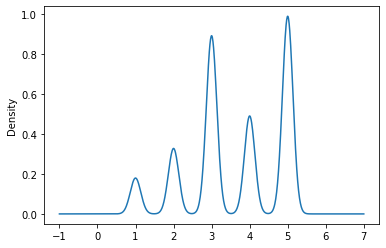

In [7]:
df['ratings_given'].plot(kind='kde')

### Doing the mean imputation and checking the distribution

In [8]:

mean=df['ratings_given'].fillna(df['ratings_given'].mean())

<AxesSubplot:ylabel='Density'>

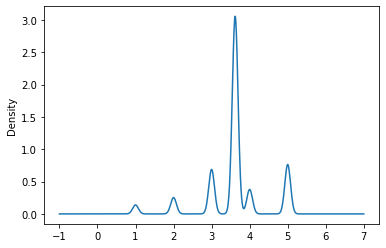

In [9]:
mean.plot(kind='kde')

### there was a huge distortion in the variance of the mean so we didn't actually fill the nan values with the mean and we checked for the median

In [10]:
med=df['ratings_given'].fillna(df['ratings_given'].median())

<AxesSubplot:ylabel='Density'>

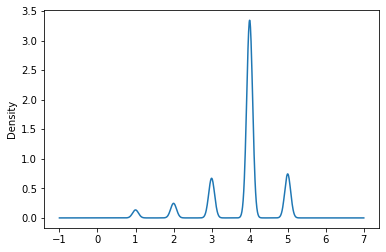

In [11]:
med.plot(kind='kde')

### again there was a huge distortion in the data so we dropped the median idea also and now

### we tried random sampling here and checked the distortion in the graph

In [12]:
random=df['ratings_given'].dropna().sample(df['ratings_given'].isnull().sum(),random_state=0,replace=True)
random.index=df[df['ratings_given'].isnull()].index
rand=df['ratings_given'].fillna(random)

In [13]:
### checking the distribution after filling it with random values

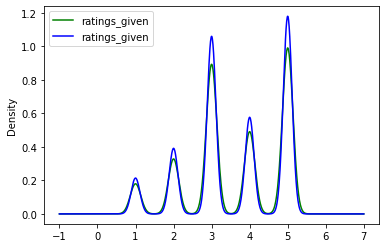

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure()

ax=fig.add_subplot(111)
df['ratings_given'].plot(kind='kde',ax=ax,color='green') ### plotting the graph for the actual data
#a.plot(kind='kde',ax=ax,color='red')
rand.plot(kind='kde',ax=ax,color='blue') ### plotting the graph for the random sample imputation
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### so from the graph we can see that there is not a huge difference in the graph so we will select this imputation to fill the nan values

In [15]:
df['ratings_given'].fillna(rand,inplace=True)

### Data Preparation is done

### Creating a column called as number of spent days in hotel

In [16]:
df['No of days spent in hotel']=df['checkout_date']-df['check_in_date']

In [17]:
df['No of days spent in hotel'].value_counts()

1 days    64066
2 days    27144
5 days    13083
6 days    12738
3 days    10842
4 days     6717
Name: No of days spent in hotel, dtype: int64

In [18]:
### changing the datatype of the ratings column

In [21]:
df['ratings_given'].astype(float)

0         1.0
1         3.0
2         5.0
3         5.0
4         5.0
         ... 
134585    2.0
134586    2.0
134587    4.0
134588    2.0
134589    3.0
Name: ratings_given, Length: 134590, dtype: float64

### merging the two csv files on the basis of the single col

In [28]:
### Reading the hotels csv files
hot=pd.read_csv('C:/Users/STUDENT-03/Desktop/Code Basics Challenge/dim_hotels.csv')


### merging the datasets

In [25]:
first_merge=df.merge(hot,on='property_id',how='inner')

In [26]:
first_merge.shape

(134590, 16)

In [27]:
first_merge.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'No of days spent in hotel', 'property_name',
       'category', 'city'],
      dtype='object')

### reading the room csv file

In [30]:
room_id=pd.read_csv('C:/Users/STUDENT-03/Desktop/Code Basics Challenge/dim_rooms.csv')

In [31]:
room_id

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### We have to change the name of the column so that we can merge easily

In [33]:
room_id.rename(columns={'room_id':'room_category'},inplace=True)

In [35]:
sec_merge=first_merge.merge(room_id,on='room_category',how='inner')

In [36]:
sec_merge.shape

(134590, 17)

### merging the aggregated bookings with the col

In [38]:
agg=pd.read_csv('C:/Users/STUDENT-03/Desktop/Code Basics Challenge/fact_aggregated_bookings.csv',parse_dates=['check_in_date'])

In [40]:
third_merge=sec_merge.merge(agg,on=['property_id','room_category','check_in_date'])

### now we will merge the date csv file 

In [42]:
date=pd.read_csv('C:/Users/STUDENT-03/Desktop/Code Basics Challenge/all files/Input Files/dim_date.csv',parse_dates=['date'])

In [43]:
date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [44]:
date.rename(columns={'date':'check_in_date'},inplace=True)

In [45]:
third_merge.shape

(134590, 19)

In [47]:
fourth_merge=third_merge.merge(date,on='check_in_date')

In [48]:
fourth_merge.shape

(134590, 22)

### Dropping the un-necessary columns

### assigning fourth merge to df

In [52]:
df=fourth_merge

In [53]:
df.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'No of days spent in hotel', 'property_name',
       'category', 'city', 'room_class', 'successful_bookings', 'capacity',
       'mmm yy', 'week no', 'day_type'],
      dtype='object')

### we don't need property_id,room_category as we have already merged the dataset

In [55]:
df.drop(['property_id','room_category'],axis=1,inplace=True)

In [56]:
df.columns

Index(['booking_id', 'booking_date', 'check_in_date', 'checkout_date',
       'no_guests', 'booking_platform', 'ratings_given', 'booking_status',
       'revenue_generated', 'revenue_realized', 'No of days spent in hotel',
       'property_name', 'category', 'city', 'room_class',
       'successful_bookings', 'capacity', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

### Data Preparation Done

### finding out the ratio of sucessful bookings to the capacity of the rooms

In [59]:
df['successful_booking_ratio']=df['successful_bookings']/df['capacity']*100

C:\Users\ST0DE1~1\AppData\Local\Temp/ipykernel_24304/2914906829.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('property_name')['revenue_generated','revenue_realized'].agg('sum').plot.bar()


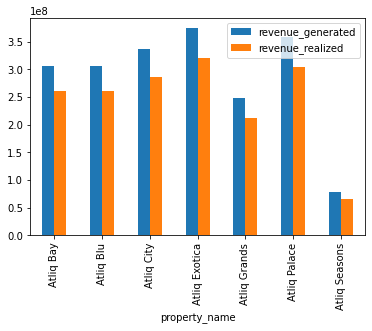

In [60]:
df.groupby('property_name')['revenue_generated','revenue_realized'].agg('sum').plot.bar()
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   booking_id                 134590 non-null  object         
 1   booking_date               134590 non-null  object         
 2   check_in_date              134590 non-null  datetime64[ns] 
 3   checkout_date              134590 non-null  datetime64[ns] 
 4   no_guests                  134590 non-null  int64          
 5   booking_platform           134590 non-null  object         
 6   ratings_given              134590 non-null  float64        
 7   booking_status             134590 non-null  object         
 8   revenue_generated          134590 non-null  int64          
 9   revenue_realized           134590 non-null  int64          
 10  No of days spent in hotel  134590 non-null  timedelta64[ns]
 11  property_name              134590 non-n

### Further Visualization in Power Bi

In [63]:
submission=df.to_csv('C:/Users/STUDENT-03/Desktop/Code Basics Challenge/all files/Input Files/code_basics_submissions.csv')